<a href="https://colab.research.google.com/github/azizeko29/new_deteksi_fraud/blob/master/%5Bnew_ENN%5D_ULB_pemodelan_ensemble_learning_hasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [0]:
def testing(model,X_test,y_test):
    result_ = []

#       t0 = time.time()
#       model.fit(X_train, y_train)
#       t1 = time.time()
#       waktu = t1 - t0
    predict = model.predict(X_test)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

    result = [accuracy,sensitivity,specifity,precision,recall,f1_score]
        
    result_.append(result)
        
    return result_

In [0]:
def hasil_CM(model,X_test,y_test):
    predict = model.predict(X_test)
    result = label_CM(y_test,predict,X_test)

    return result
  
def label_CM(actual,predict,X_test):
    label = []
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                label.append('TN')
            else:
                label.append('FP')
        if val == 1:
            if val == predict[i]:
                label.append('TP')
            else:
                label.append('FN')

    df_result = X_test.copy()
    df_result['class actual'] = actual
    df_result['class prediksi'] = predict
    df_result['Conf Matrik'] = label

    return df_result

## ---------

In [13]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ##read data

df_train = pd.read_csv('drive/My Drive/Deteksi fraud/data/ULB_preprocessing_train.csv',sep=";")

# read_df.head()

In [0]:
# ##read data

df_test = pd.read_csv('drive/My Drive/Deteksi fraud/data/ULB_preprocessing_test.csv',sep=";")

# read_df.head()

## --

In [16]:
df_train['Class'].value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [0]:
X = df_train.drop('Class', axis=1)
y = df_train['Class'].copy()

In [18]:
ratio_class = dict(df_train['Class'].value_counts())
ratio_class

{0: 199020, 1: 344}

In [0]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours # doctest: +NORMALIZE_WHITESPACE

# RandomUnderSampler
sampler = EditedNearestNeighbours(random_state=1)
# sampler = EditedNearestNeighbours(ratio=ratio_class)

X_sample, y_sample = sampler.fit_sample(X, y)
# print('Random undersampling {}'.format(Counter(y_rs))

In [0]:
# X_sample, y_sample = sampler.fit_sample(X, y)
# print('Random undersampling {}'.format(Counter(y_rs))

In [0]:
df_new = pd.DataFrame(X_sample,columns=df_train.columns[:-1])
df_new['Class'] = y_sample

In [0]:
# count = 0
# for a in df_new.columns:
#     if df_new[a].isnull().sum() > 0 :
#         print(a)
#         count+=1
# count

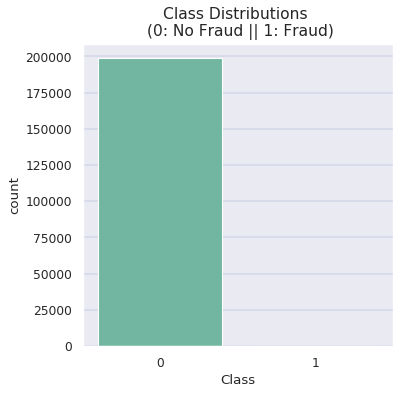

In [23]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [0]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [25]:
y_new.value_counts()

0    198695
1       344
Name: Class, dtype: int64

In [26]:
X_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [0]:
X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class'].copy()

In [28]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

# # k-folds


In [0]:
def validasi_model (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [0]:
# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

    
clf_RF = RandomForestClassifier(random_state=1,n_estimators=75)
clf_AB = AdaBoostClassifier(random_state=1,n_estimators=100)
clf_B = BaggingClassifier(random_state=1,n_estimators=100)
clf_ET = ExtraTreesClassifier(random_state=1,n_estimators=100)
clf_GB = GradientBoostingClassifier(random_state=1)

##skenario 
skenario_1 = {}
skenario_1['1'] = clf_RF
# skenario_1['2'] = clf_AB
# skenario_1['3'] = clf_B
# skenario_1['4'] = clf_ET
# skenario_1['5'] = clf_GB


In [0]:
def validasi_testing (clf,X,y):
    testing_result = testing(clf,X,y)
    df_result = pd.DataFrame(data= testing_result, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

#     df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [32]:
from sklearn.ensemble import RandomForestClassifier
# n_tree = 100
# clf_RF_ = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf_RF.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [33]:
result = {}
for i in skenario_1:
  
    clf_skenario = skenario_1[i]
    result[i] = validasi_testing(clf_skenario,X_test,y_test)
    
                
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

nama_file = 'drive/My Drive/Deteksi fraud/hasil/ENN/ULB/testing/result_tuning.csv'

df_result.to_csv(nama_file, sep=';',index=False)

df_result


,Akurasi,Sensitivity,Specifity,precision,recall,f1_score
0,0.999555,0.817568,0.999871,0.916667,0.817568,0.864286


In [34]:
hasil_cm = hasil_CM(clf_skenario,X_test,y_test)
hasil_cm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class actual,class prediksi,Conf Matrik
0,72828.0,-1.142801,1.409180,-0.646741,-1.254767,2.420123,3.376525,-0.204954,0.135930,0.019185,0.357833,0.035796,-0.251040,-0.096891,-0.410270,1.123010,0.670276,-0.445253,0.296747,0.215836,0.273384,0.391299,-1.307445,0.115663,0.913466,0.111612,0.092952,0.369318,0.217595,1.79,0,0,TN
1,160654.0,-1.088132,0.744172,0.761392,-0.861099,0.905130,-0.386599,1.162297,-0.066910,-0.211388,-0.639000,-1.398971,-0.640360,-0.939228,0.210836,-0.303828,-0.136994,-0.301032,-0.502500,0.299998,0.040266,-0.319960,-0.900011,-0.310377,0.469027,0.699531,0.390946,0.075354,0.110781,58.44,0,0,TN
2,69783.0,-9.156731,-1.036810,-4.665348,4.390102,-6.271095,2.299906,0.001721,3.595945,-2.478871,-0.943510,0.435353,1.767629,0.743000,3.402883,1.564858,1.770795,1.703527,-0.090776,0.221188,-1.961031,0.012017,-0.756726,-2.000589,-0.027954,-1.011416,-0.178245,-1.274012,-1.466693,492.91,0,0,TN
3,155489.0,-0.077927,-0.021284,0.961083,-0.315242,-0.132506,-0.489234,0.186363,0.127606,0.119211,-0.338046,0.748297,0.565700,-0.445763,0.175456,-0.353326,0.432332,-0.644371,0.240556,0.477859,0.058023,-0.044945,-0.283158,0.444829,0.047220,-1.311732,0.152113,0.074119,0.115249,59.99,0,0,TN
4,57783.0,-1.794857,1.124720,0.179232,-2.427335,0.196062,-0.969808,0.579130,0.515615,0.199792,-1.432433,0.458249,0.815743,-0.504339,1.016147,0.261781,-0.035981,-0.612508,0.405203,0.921359,-0.169165,-0.297559,-1.002809,-0.336454,-0.554990,0.697254,-1.120106,-0.375169,-0.265168,24.70,0,0,TN


In [0]:
nama_file = 'drive/My Drive/Deteksi fraud/data/ULB_hasil_CM.csv'

hasil_cm.to_csv(nama_file, sep=';',index=False)

-------